In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

df=pd.read_csv("enhanced_student_habits_performance_dataset.csv")
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.9,2.0,No,97.6,7.9,...,9.2,Cafe,No,High,7.0,2.0,10.0,Auditory,10.0,87.0
1,110198,24,Female,Arts,0.500000,1.8,0.4,Yes,77.6,6.5,...,4.0,Quiet Room,No,High,1.0,2.0,10.0,Auditory,4.0,87.0
2,110199,26,Other,Computer Science,5.086285,1.1,3.7,Yes,97.9,7.5,...,10.1,Library,Yes,Medium,4.0,7.0,8.0,Auditory,2.4,97.0
3,110200,24,Male,Psychology,7.000000,0.9,2.8,No,42.0,7.8,...,11.9,Dorm,Yes,High,9.0,6.0,9.0,Visual,9.7,96.0
4,110201,19,Female,Engineering,2.500000,4.3,1.5,No,73.1,8.4,...,9.9,Dorm,Yes,Low,6.0,2.0,10.0,Visual,3.5,76.0
5,110202,21,Other,Biology,5.200000,1.4,0.7,No,71.1,6.1,...,7.3,Cafe,Yes,Low,8.0,8.0,7.0,Reading,6.5,92.0
6,110203,26,Other,Arts,1.500000,3.3,4.0,Yes,77.7,7.2,...,10.6,Library,Yes,High,10.0,5.0,10.0,Kinesthetic,5.2,84.0
7,110204,19,Female,Biology,6.500000,3.6,2.0,No,82.0,11.0,...,14.0,Co-Learning Group,No,High,7.0,3.0,10.0,Kinesthetic,6.6,96.0


In [2]:
valores_faltantes=df.isnull().sum()

valores_faltantes=valores_faltantes[valores_faltantes>0]
if valores_faltantes.empty:
    print("Não foram encontrados valores faltantes.")
else:
    print("Colunas com valores faltantes:\n",valores_faltantes)

Colunas com valores faltantes:
 parental_education_level    4596
parental_support_level         1
motivation_level               1
exam_anxiety_score             1
learning_style                 2
time_management_score          2
exam_score                     2
dtype: int64


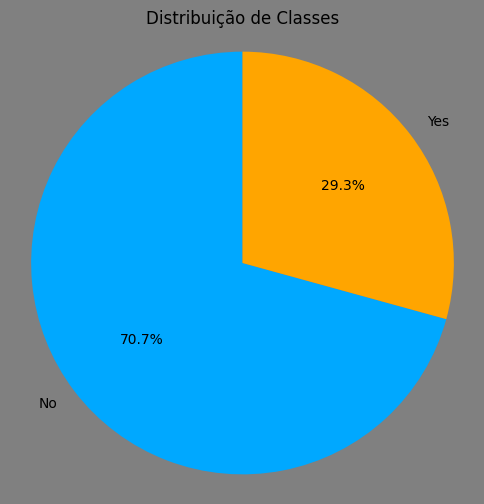

In [3]:
#plotando Distribuição de Classes
count = df['dropout_risk'].value_counts()

fig, ax = plt.subplots(figsize=(6,6), facecolor='grey')
colors = ['#00A8FF', '#FFA500'] 
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Classes')
plt.axis('equal')
plt.show()

In [4]:
# Aleatória com 20% dos dados
df_sample = df.sample(frac=0.2, random_state=42)
df_sample

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
34891,145088,18,Other,Computer Science,6.865091,0.500000,1.300000,No,96.100000,4.30000,...,10.400000,Cafe,Yes,Low,5.0,3.0,10.000000,Kinesthetic,6.600000,73.000000
63587,173784,18,Female,Arts,1.300000,1.300000,1.700000,Yes,61.000000,7.20000,...,5.100000,Library,Yes,Medium,5.0,9.0,6.000000,Visual,8.800000,87.000000
60627,170824,25,Male,Engineering,7.300000,4.400000,1.100000,No,90.000000,7.20000,...,13.500000,Cafe,Yes,High,7.0,10.0,5.000000,Auditory,5.700000,100.000000
27085,137282,24,Other,Biology,3.600000,3.100000,0.500000,Yes,82.300000,7.90000,...,8.300000,Dorm,Yes,Low,3.0,3.0,10.000000,Auditory,6.800000,100.000000
36642,146839,27,Female,Computer Science,8.274310,3.600000,3.500000,Yes,52.200000,6.40000,...,17.200000,Cafe,No,High,2.0,8.0,7.000000,Reading,6.600000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70877,181074,21,Other,Engineering,4.080000,4.400000,4.000000,Yes,54.700000,4.70000,...,9.700000,Noisy,Yes,Low,3.0,3.0,8.000000,Visual,2.800000,65.000000
57478,167675,16,Other,Business,5.400000,2.900000,1.500000,No,41.400000,6.20000,...,10.600000,Library,Yes,High,7.0,7.0,8.000000,Reading,4.500000,95.000000
70159,180356,28,Female,Arts,1.030000,2.700000,3.300000,No,72.100000,4.40000,...,10.800000,Uncomfortable,No,Lower-Middle,4.0,1.0,9.000000,Visual,4.100000,6.000000
91889,202086,19,Male,Biology,3.630763,3.744241,2.042763,Yes,71.241687,6.52775,...,10.327891,Co-Learning Group,No,Low,9.0,2.0,3.649338,Reading,8.356176,92.685158


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96767 entries, 0 to 96766
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     96767 non-null  int64  
 1   age                            96767 non-null  int64  
 2   gender                         96767 non-null  object 
 3   major                          96767 non-null  object 
 4   study_hours_per_day            96767 non-null  float64
 5   social_media_hours             96767 non-null  float64
 6   netflix_hours                  96767 non-null  float64
 7   part_time_job                  96767 non-null  object 
 8   attendance_percentage          96767 non-null  float64
 9   sleep_hours                    96767 non-null  float64
 10  diet_quality                   96767 non-null  object 
 11  exercise_frequency             96767 non-null  int64  
 12  parental_education_level       92171 non-null 

In [6]:
df = df.dropna()
df.head(8)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,110197,17,Female,Engineering,3.300000,2.9,2.0,No,97.6,7.9,...,9.2,Cafe,No,High,7.0,2.0,10.0,Auditory,10.0,87.0
1,110198,24,Female,Arts,0.500000,1.8,0.4,Yes,77.6,6.5,...,4.0,Quiet Room,No,High,1.0,2.0,10.0,Auditory,4.0,87.0
2,110199,26,Other,Computer Science,5.086285,1.1,3.7,Yes,97.9,7.5,...,10.1,Library,Yes,Medium,4.0,7.0,8.0,Auditory,2.4,97.0
3,110200,24,Male,Psychology,7.000000,0.9,2.8,No,42.0,7.8,...,11.9,Dorm,Yes,High,9.0,6.0,9.0,Visual,9.7,96.0
4,110201,19,Female,Engineering,2.500000,4.3,1.5,No,73.1,8.4,...,9.9,Dorm,Yes,Low,6.0,2.0,10.0,Visual,3.5,76.0
5,110202,21,Other,Biology,5.200000,1.4,0.7,No,71.1,6.1,...,7.3,Cafe,Yes,Low,8.0,8.0,7.0,Reading,6.5,92.0
6,110203,26,Other,Arts,1.500000,3.3,4.0,Yes,77.7,7.2,...,10.6,Library,Yes,High,10.0,5.0,10.0,Kinesthetic,5.2,84.0
7,110204,19,Female,Biology,6.500000,3.6,2.0,No,82.0,11.0,...,14.0,Co-Learning Group,No,High,7.0,3.0,10.0,Kinesthetic,6.6,96.0


In [7]:
#Retirada de atributos que não tem relação com o ambiente que o aluno está inserido
df_sem_atributos = df.drop(columns=['student_id', 'major', 'age', 'gender', 'social_media_hours', 
                                    'netflix_hours','attendance_percentage','study_hours_per_day', 
                                    'learning_style','diet_quality', 'exercise_frequency',
                                     'time_management_score','semester', 'study_environment',
                                    'extracurricular_participation', 'previous_gpa', 'screen_time',
                                     'exam_score', 'semester' ])
display(df_sem_atributos.head(8))

print("Número de colunas:", df_sem_atributos.shape[1])

,part_time_job,sleep_hours,parental_education_level,internet_quality,mental_health_rating,stress_level,dropout_risk,social_activity,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score
0,No,7.9,Bachelor,Low,2.6,8.8,Yes,4.0,No,High,7.0,2.0,10.0
1,Yes,6.5,Master,Medium,3.1,2.4,No,3.0,No,High,1.0,2.0,10.0
2,Yes,7.5,PhD,Medium,3.6,8.3,No,0.0,Yes,Medium,4.0,7.0,8.0
3,No,7.8,Master,Medium,6.7,4.4,No,5.0,Yes,High,9.0,6.0,9.0
4,No,8.4,PhD,Low,6.8,5.7,No,1.0,Yes,Low,6.0,2.0,10.0
5,No,6.1,High School,Low,2.8,7.2,No,3.0,Yes,Low,8.0,8.0,7.0
6,Yes,7.2,Master,High,5.2,3.5,No,4.0,Yes,High,10.0,5.0,10.0
7,No,11.0,High School,Medium,8.1,3.6,No,3.0,No,High,7.0,3.0,10.0


Número de colunas: 13


In [8]:
print("Tipos de dados antes da transformação: ")
print(df_sem_atributos.dtypes)

nao_numericos = df_sem_atributos.select_dtypes(include='object').columns.to_list()
numericos = df_sem_atributos.select_dtypes(include=['int64','float64'])

print(f"Colunas não numéricas: {nao_numericos}")
print(f"Colunas numéricas: {list(numericos)}")

Tipos de dados antes da transformação: 
part_time_job                object
sleep_hours                 float64
parental_education_level     object
internet_quality             object
mental_health_rating        float64
stress_level                float64
dropout_risk                 object
social_activity             float64
access_to_tutoring           object
family_income_range          object
parental_support_level      float64
motivation_level            float64
exam_anxiety_score          float64
dtype: object
Colunas não numéricas: ['part_time_job', 'parental_education_level', 'internet_quality', 'dropout_risk', 'access_to_tutoring', 'family_income_range']
Colunas numéricas: ['sleep_hours', 'mental_health_rating', 'stress_level', 'social_activity', 'parental_support_level', 'motivation_level', 'exam_anxiety_score']


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

entradas = df_sem_atributos.drop('dropout_risk', axis='columns')
alvo = df['dropout_risk']

treinarEntradas, testarEntradas, treinarAlvo, testarAlvo = train_test_split(entradas, alvo, test_size=0.3)

trabalhoPeriodo = LabelEncoder()
horasSono = LabelEncoder()
educacaoPais = LabelEncoder()
qualidadeInternet = LabelEncoder()
saudeMental = LabelEncoder()
nivelEstresse = LabelEncoder()
atividadeSocial = LabelEncoder()
salarioFamilia = LabelEncoder()
apoioPais = LabelEncoder()
nivelMotivacao = LabelEncoder()
ansiedadeProva = LabelEncoder()

entradas['partTimeJob'] = trabalhoPeriodo.fit_transform(entradas['part_time_job'])
entradas['sleepHours'] = horasSono.fit_transform(entradas['sleep_hours'])
entradas['parentalEducationLevel'] = educacaoPais.fit_transform(entradas['parental_education_level'])
entradas['internetQuality'] = qualidadeInternet.fit_transform(entradas['internet_quality'])
entradas['mentalHealthRating'] = saudeMental.fit_transform(entradas['mental_health_rating'])
entradas['stressLevel'] = nivelEstresse.fit_transform(entradas['stress_level'])
entradas['socialActivity'] = atividadeSocial.fit_transform(entradas['social_activity'])
entradas['familyIncomeRange'] = salarioFamilia.fit_transform(entradas['family_income_range'])
entradas['parentalSupportLevel'] = apoioPais.fit_transform(entradas['parental_support_level'])
entradas['motivationLevel'] = nivelMotivacao.fit_transform(entradas['motivation_level'])
entradas['examAnxiety'] = ansiedadeProva.fit_transform(entradas['exam_anxiety_score'])

entradasNovas = entradas.drop(['part_time_job','sleep_hours','parental_education_level','internet_quality','mental_health_rating','stress_level',
                        'social_activity','access_to_tutoring','family_income_range','parental_support_level','motivation_level','exam_anxiety_score'], axis='columns')

entradasNovas


,partTimeJob,sleepHours,parentalEducationLevel,internetQuality,mentalHealthRating,stressLevel,socialActivity,familyIncomeRange,parentalSupportLevel,motivationLevel,examAnxiety
0,0,16290,0,2,3045,13364,40,0,7,1,16650
1,1,10435,3,3,3922,14,30,0,1,1,16650
2,1,14623,5,3,4776,12009,0,3,4,6,12934
3,0,15852,3,3,10562,1158,50,0,9,5,14798
4,0,16685,5,2,10745,4718,10,1,6,1,16650
...,...,...,...,...,...,...,...,...,...,...,...
96761,1,13445,5,3,6315,4769,69,0,5,0,8073
96763,1,2872,2,2,4751,7251,10,0,4,8,2645
96764,0,12412,5,1,1170,14319,0,0,5,6,417
96765,1,14334,0,2,9923,5979,50,0,2,0,6364


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import tree

modelo = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(entradasNovas, alvo, test_size=0.3, random_state=42)
modelo.fit(X_train, y_train)
print("Acerto no treino:", modelo.score(X_train, y_train))
print("Acerto no teste:", modelo.score(X_test, y_test))

Acerto no treino: 1.0
Acerto no teste: 0.9949368919749738


In [11]:
from sklearn.tree import DecisionTreeClassifier

#Entropia (Quanto maior a entropia, menor o ganho de inforamações e vice-versa)
clf = DecisionTreeClassifier(criterion= "entropy", max_depth=4)
clf = clf.fit(X_train, y_train)

clf.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [12]:
X_test

,partTimeJob,sleepHours,parentalEducationLevel,internetQuality,mentalHealthRating,stressLevel,socialActivity,familyIncomeRange,parentalSupportLevel,motivationLevel,examAnxiety
58991,1,16681,0,2,10745,5913,20,0,9,0,16650
71266,0,11681,2,1,3218,6492,20,1,3,0,11154
45824,0,16686,0,3,11509,15,30,3,1,3,16650
47608,0,14623,2,3,15236,5605,30,3,4,1,16650
82587,1,3576,2,1,15407,16247,20,3,1,2,11243
...,...,...,...,...,...,...,...,...,...,...,...
24342,0,16691,5,1,9779,2226,30,3,2,1,16650
41373,1,3731,3,3,13747,8989,10,0,6,5,14798
57018,1,0,3,3,12250,1158,40,0,2,8,9346
54114,1,12508,5,2,15799,3921,20,3,3,7,11154


In [13]:
from sklearn import metrics

y_previsao = clf.predict(X_test)
print("Previsão:", metrics.accuracy_score(y_test, y_previsao))

#Faz previsão utilizando o teste realizado para calcular uma acurácia 
print("Acurácia:", modelo.score(entradasNovas, alvo))

Previsão: 0.929116487649633
Acurácia: 0.9984810511126301


In [14]:
dadosNovos = pd.DataFrame([{
    'partTimeJob': 1,
    'sleepHours': 1,
    'parentalEducationLevel': 1,
    'internetQuality': 1,
    'mentalHealthRating': 1,	
    'stressLevel': 1,
    'socialActivity': 1,
    'familyIncomeRange': 1,
    'parentalSupportLevel': 1,
    'motivationLevel': 1,
    'examAnxiety': 1,
}])

predict = modelo.predict(dadosNovos)
print("Previsão da possibilidade de evasão:", predict)

Previsão da possibilidade de evasão: ['Yes']


Utilizando uma Random Forest para verificar a importância de cada variável (melhor distribuição do que a árvore de decisão)

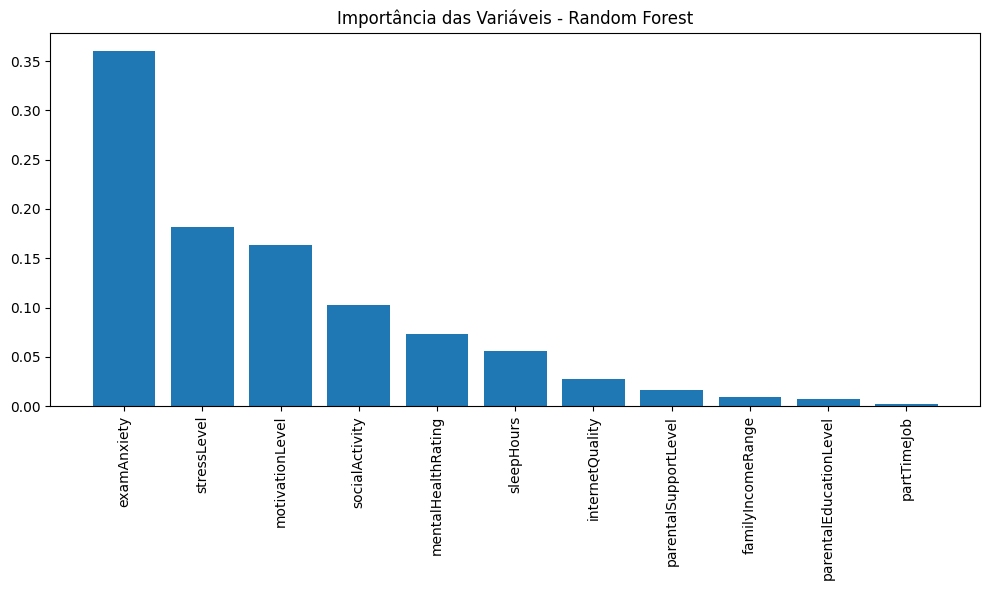

In [17]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(entradasNovas, alvo)

importances = modelo_rf.feature_importances_
feature_names = list(entradasNovas.columns)

plt.figure(figsize=(10,6))
plt.title("Importância das Variáveis - Random Forest")
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Verificando a correlação entre os atributos e o atributo alvo

In [19]:
df_temp = entradasNovas.copy()
df_temp['dropout_risk'] = alvo.map({'Yes': 1, 'No': 0})
print(df_temp.corr()['dropout_risk'].sort_values(ascending=False))


dropout_risk              1.000000
stressLevel               0.481856
socialActivity            0.129174
familyIncomeRange         0.006825
partTimeJob               0.003042
parentalEducationLevel   -0.007602
parentalSupportLevel     -0.071672
internetQuality          -0.088213
motivationLevel          -0.146497
sleepHours               -0.276248
mentalHealthRating       -0.303497
examAnxiety              -0.440749
Name: dropout_risk, dtype: float64
